<a href="https://colab.research.google.com/github/joaopavila120/Julia---Datascience-and-deep-learning-in-iris-dataset/blob/main/datascienceJulia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2023-06-19 23:10:08 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × AMD EPYC 7B12
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, znver2)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


In [ ]:
using BenchmarkTools

M = rand(2^11, 2^11)

@btime $M * $M;

  405.134 ms (2 allocations: 32.00 MiB)


In [ ]:
try
    using CUDA
catch
    println("No GPU found.")
else
    run(`nvidia-smi`)
    # Create a new random matrix directly on the GPU:
    M_on_gpu = CUDA.CURAND.rand(2^11, 2^11)
    @btime $M_on_gpu * $M_on_gpu; nothing
end

No GPU found.


Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />

In [ ]:
using Pkg
Pkg.add("GR")


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Graphite2_jll ──────────────── v1.3.14+0
   Installed Wayland_protocols_jll ──────── v1.25.0+0
   Installed JpegTurbo_jll ──────────────── v2.1.91+0
   Installed Pixman_jll ─────────────────── v0.42.2+0
   Installed Xorg_xcb_util_renderutil_jll ─ v0.3.9+1
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed XML2_jll ───────────────────── v2.10.3+0
   Installed libass_jll ─────────────────── v0.15.1+0
   Installed GR_jll ─────────────────────── v0.72.7+0
   Installed Xorg_libXext_jll ───────────── v1.3.4+4
   Installed Gettext_jll ────────────────── v0.21.0+0
   Installed Wayland_jll ────────────────── v1.21.0+0
   Installed Zstd_jll ───────────────────── v1.5.5+0
   Installed Qt5Base_jll ────────────────── v5.15.3+2
   Installed LERC_jll ───────────────────── v3.0

In [ ]:
Pkg.add("Plots")


   Resolving package versions...
   Installed RelocatableFolders ── v1.0.0
   Installed PlotUtils ─────────── v1.3.5
   Installed Grisu ─────────────── v1.0.2
   Installed Measures ──────────── v0.3.2
   Installed RecipesPipeline ───── v0.6.12
   Installed Formatting ────────── v0.4.2
   Installed Missings ──────────── v1.1.0
   Installed FFMPEG ────────────── v0.4.1
   Installed IrrationalConstants ─ v0.2.2
   Installed Unitful ───────────── v1.14.0
   Installed Contour ───────────── v0.6.2
   Installed Showoff ───────────── v1.0.3
   Installed Pipe ──────────────── v1.3.0
   Installed fzf_jll ───────────── v0.29.0+0
   Installed NaNMath ───────────── v1.0.2
   Installed PlotThemes ────────── v3.1.0
   Installed SpecialFunctions ──── v2.2.0
   Installed UnicodeFun ────────── v0.4.1
   Installed JLFzf ─────────────── v0.1.5
   Installed StatsAPI ──────────── v1.6.0
   Installed Compat ────────────── v4.6.1
   Installed DataStructures ────── v0.18.13
   Installed Scratch ───────────── v

In [ ]:
theme(:ggplot2)

In [ ]:
Pkg.add("PlotThemes")
Pkg.add("DataFrames")
Pkg.add("DataFramesMeta")
Pkg.add("RDatasets")

   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [ccf2f8ad] + PlotThemes v3.1.0
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
   Installed Chain ────────── v0.5.0
   Installed DataFramesMeta ─ v0.14.0
    Updating `~/.julia/environments/v1.8/Project.toml`
  [1313f7d8] + DataFramesMeta v0.14.0
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [8be319e6] + Chain v0.5.0
  [1313f7d8] + DataFramesMeta v0.14.0
Precompiling project...
  ✓ Chain
  ✓ DataFramesMeta
  2 dependencies successfully precompiled in 4 seconds. 170 already precompiled.
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


Lib para puxar o dataset das flores

Iris contém dados de três espécies de flores de íris: setosa, versicolor e virginica. Para cada espécie, contém medidas de comprimento e largura das sépalas e medidas de comprimento e largura das pétalas

In [ ]:
iris = dataset("datasets", "iris")

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa



*   SepalLength: Comprimento da sépala em centímetros.
*   SepalWidth: Largura da sépala em centímetros.
*   PetalLength: Comprimento da pétala em centímetros.
*   PetalWidth: Largura da pétala em centímetros.
*   Species: Espécie da flor de íris (setosa, versicolor ou virginica).


 gráfico de dispersão dos comprimentos das sépalas em relação à largura das sépalas, com diferentes cores para cada espécie de íris.

In [ ]:
first(iris, 5)

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [ ]:
size(iris)

(150, 5)

In [ ]:
setosa = iris[iris[!, :Species] .== "setosa", :]  # Filtra as linhas onde a espécie é "setosa"


Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [ ]:
sorted_data = sort(iris, :SepalLength)  # Ordena o conjunto de dados com base na coluna "SepalLength"


Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,4.3,3.0,1.1,0.1,setosa
2,4.4,2.9,1.4,0.2,setosa
3,4.4,3.0,1.3,0.2,setosa
4,4.4,3.2,1.3,0.2,setosa
5,4.5,2.3,1.3,0.3,setosa
6,4.6,3.1,1.5,0.2,setosa
7,4.6,3.4,1.4,0.3,setosa
8,4.6,3.6,1.0,0.2,setosa
9,4.6,3.2,1.4,0.2,setosa


In [ ]:
mean_sepal_width = mean(iris[!, :SepalWidth])  # Calcula a média da largura da sépala

3.0573333333333337

# Visualização dos dados

O gráfico abaixo é equivalente ao ggplot() do tidyverse em R.

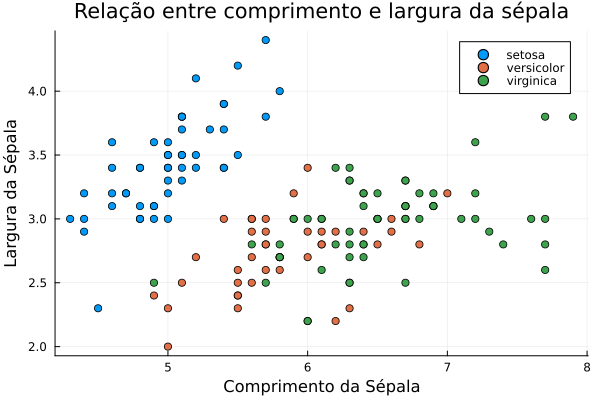

In [ ]:
using Plots
gr()

scatter(iris[!, :SepalLength], iris[!, :SepalWidth],
        group=iris[!, :Species],
        xlabel="Comprimento da Sépala",
        ylabel="Largura da Sépala",
        title="Relação entre comprimento e largura da sépala")

O histograma abaixo é equivalente ao ggplot() do tidyverse em R.

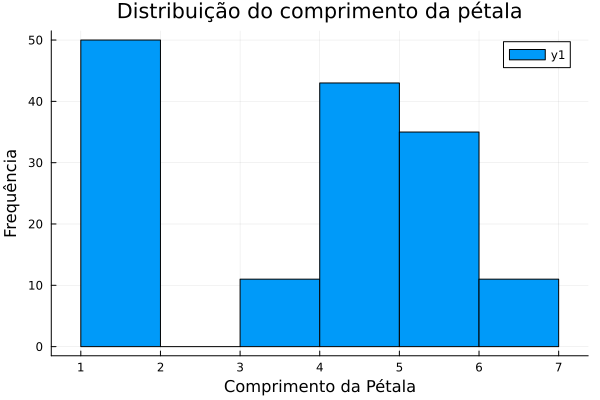

In [ ]:
histogram(iris[!, :PetalLength],
          bins=10,
          xlabel="Comprimento da Pétala",
          ylabel="Frequência",
          title="Distribuição do comprimento da pétala")

In [ ]:
iris[!, :SepalRatio] = iris[!, :SepalWidth] ./ iris[!, :SepalLength]  # Calcula a relação entre largura e comprimento da sépala e adiciona em uma nova coluna

150-element Vector{Float64}:
 0.6862745098039216
 0.6122448979591836
 0.6808510638297872
 0.673913043478261
 0.72
 0.7222222222222222
 0.7391304347826088
 0.6799999999999999
 0.6590909090909091
 0.6326530612244897
 0.6851851851851851
 0.7083333333333334
 0.625
 ⋮
 0.5
 0.4492753623188406
 0.4626865671641791
 0.4492753623188406
 0.4655172413793104
 0.4705882352941177
 0.4925373134328358
 0.44776119402985076
 0.39682539682539686
 0.46153846153846156
 0.5483870967741935
 0.5084745762711864

In [ ]:
first(iris, 5)

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,SepalRatio
,Float64,Float64,Float64,Float64,Cat…,Float64
1,5.1,3.5,1.4,0.2,setosa,0.686275
2,4.9,3.0,1.4,0.2,setosa,0.612245
3,4.7,3.2,1.3,0.2,setosa,0.680851
4,4.6,3.1,1.5,0.2,setosa,0.673913
5,5.0,3.6,1.4,0.2,setosa,0.72


In [ ]:
using DataFrames, Statistics

grouped_data = combine(groupby(iris, :Species),
                       :SepalLength => mean => :avg_sepal_length,
                       :PetalWidth => maximum => :max_petal_width)


Row,Species,avg_sepal_length,max_petal_width
,Cat…,Float64,Float64
1,setosa,5.006,0.6
2,versicolor,5.936,1.8
3,virginica,6.588,2.5


In [ ]:
Pkg.add("CSV")
using CSV

CSV.write("iris.csv", iris)

   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [336ed68f] + CSV v0.10.11
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


"iris.csv"

Machine Learning

In [ ]:
begin
    Pkg.add("Flux")
    Pkg.add("CUDA")
    Pkg.add("IterTools")

    using Flux
    using Flux: Data.DataLoader
    using Flux: @epochs
    using CUDA
    using Random
    using IterTools: ncycle

    Random.seed!(123);
end

   Resolving package versions...
   Installed ContextVariablesX ────── v0.1.3
   Installed InitialValues ────────── v0.3.1
   Installed NNlibCUDA ────────────── v0.2.7
   Installed TimerOutputs ─────────── v0.5.23
   Installed ShowCases ────────────── v0.1.0
   Installed cuDNN ────────────────── v1.0.4
   Installed CEnum ────────────────── v0.4.2
   Installed Optimisers ───────────── v0.2.18
   Installed BFloat16s ────────────── v0.4.2
   Installed CUDA_Runtime_jll ─────── v0.6.0+0
   Installed GPUArrays ────────────── v8.7.1
   Installed NNlib ────────────────── v0.8.21
   Installed RandomNumbers ────────── v1.5.3
   Installed PrettyPrint ──────────── v0.2.0
   Installed ZygoteRules ──────────── v0.2.3
   Installed MLUtils ──────────────── v0.4.3
   Installed RealDot ──────────────── v0.1.0
   Installed LLVM ─────────────────── v5.2.0
   Installed CUDA_Driver_jll ──────── v0.5.0+1
   Installed ProgressLogging ──────── v0.1.4
   Installed IRTools ──────────────── v0.4.10
   Installed O

TaskLocalRNG()

A biblioteca DataFrames é usada para trabalhar com o conjunto de dados. Random é utilizada para definir uma semente para reprodução dos resultados.
Flux é uma biblioteca de aprendizado de máquina que será utilizada para construir e treinar o modelo de classificação.
 As outras importações específicas do Flux são funções e tipos específicos utilizados no código.

In [ ]:
using DataFrames
using Random
using Flux
using Flux: Chain, Dense, softmax, crossentropy, onecold, params, train!, relu

In [ ]:
df = dataset("datasets", "iris")

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


A função Matrix é usada para converter o DataFrame em uma matriz, que será mais conveniente para o processamento posterior.

In [ ]:
data = Matrix(df)

150×5 Matrix{Any}:
 5.1  3.5  1.4  0.2  "setosa"
 4.9  3.0  1.4  0.2  "setosa"
 4.7  3.2  1.3  0.2  "setosa"
 4.6  3.1  1.5  0.2  "setosa"
 5.0  3.6  1.4  0.2  "setosa"
 5.4  3.9  1.7  0.4  "setosa"
 4.6  3.4  1.4  0.3  "setosa"
 5.0  3.4  1.5  0.2  "setosa"
 4.4  2.9  1.4  0.2  "setosa"
 4.9  3.1  1.5  0.1  "setosa"
 5.4  3.7  1.5  0.2  "setosa"
 4.8  3.4  1.6  0.2  "setosa"
 4.8  3.0  1.4  0.1  "setosa"
 ⋮                   
 6.0  3.0  4.8  1.8  "virginica"
 6.9  3.1  5.4  2.1  "virginica"
 6.7  3.1  5.6  2.4  "virginica"
 6.9  3.1  5.1  2.3  "virginica"
 5.8  2.7  5.1  1.9  "virginica"
 6.8  3.2  5.9  2.3  "virginica"
 6.7  3.3  5.7  2.5  "virginica"
 6.7  3.0  5.2  2.3  "virginica"
 6.3  2.5  5.0  1.9  "virginica"
 6.5  3.0  5.2  2.0  "virginica"
 6.2  3.4  5.4  2.3  "virginica"
 5.9  3.0  5.1  1.8  "virginica"

Embaralhando os dados: A função shuffle é utilizada para embaralhar as linhas da matriz de dados. A função Random.seed! é utilizada para definir uma semente de aleatoriedade fixa, garantindo que os resultados possam ser reproduzidos.

In [ ]:
Random.seed!(1234)
data = data[shuffle(1:end), :]


150×5 Matrix{Any}:
 5.6  3.0  4.5  1.5  "versicolor"
 5.2  3.4  1.4  0.2  "setosa"
 6.4  2.9  4.3  1.3  "versicolor"
 4.9  3.1  1.5  0.1  "setosa"
 5.4  3.9  1.3  0.4  "setosa"
 4.9  3.0  1.4  0.2  "setosa"
 4.6  3.4  1.4  0.3  "setosa"
 5.0  3.6  1.4  0.2  "setosa"
 4.4  2.9  1.4  0.2  "setosa"
 5.7  4.4  1.5  0.4  "setosa"
 5.6  2.5  3.9  1.1  "versicolor"
 5.0  3.5  1.6  0.6  "setosa"
 5.1  3.4  1.5  0.2  "setosa"
 ⋮                   
 5.7  2.8  4.1  1.3  "versicolor"
 7.3  2.9  6.3  1.8  "virginica"
 5.4  3.4  1.7  0.2  "setosa"
 5.5  2.4  3.8  1.1  "versicolor"
 4.8  3.1  1.6  0.2  "setosa"
 5.4  3.4  1.5  0.4  "setosa"
 5.4  3.7  1.5  0.2  "setosa"
 5.2  2.7  3.9  1.4  "versicolor"
 5.0  2.0  3.5  1.0  "versicolor"
 7.6  3.0  6.6  2.1  "virginica"
 7.7  2.6  6.9  2.3  "virginica"
 7.9  3.8  6.4  2.0  "virginica"

A variável train_test_ratio define a proporção entre dados de treinamento e teste. O índice idx é calculado como a parte inteira do número de linhas do DataFrame multiplicado pela proporção de treinamento. Em seguida, os dados são divididos em data_train (dados de treinamento) e data_test (dados de teste).

In [ ]:
train_test_ratio = 0.7
idx = Int(floor(size(df, 1) * train_test_ratio))
data_train = data[1:idx, :]
data_test = data[idx+1:end, :]

45×5 Matrix{Any}:
 6.8  2.8  4.8  1.4  "versicolor"
 6.8  3.0  5.5  2.1  "virginica"
 5.9  3.0  5.1  1.8  "virginica"
 6.0  3.0  4.8  1.8  "virginica"
 7.7  3.8  6.7  2.2  "virginica"
 6.5  3.2  5.1  2.0  "virginica"
 5.6  2.9  3.6  1.3  "versicolor"
 6.2  2.2  4.5  1.5  "versicolor"
 6.3  3.3  6.0  2.5  "virginica"
 5.1  3.7  1.5  0.4  "setosa"
 4.7  3.2  1.3  0.2  "setosa"
 4.6  3.1  1.5  0.2  "setosa"
 5.8  2.6  4.0  1.2  "versicolor"
 ⋮                   
 5.7  2.8  4.1  1.3  "versicolor"
 7.3  2.9  6.3  1.8  "virginica"
 5.4  3.4  1.7  0.2  "setosa"
 5.5  2.4  3.8  1.1  "versicolor"
 4.8  3.1  1.6  0.2  "setosa"
 5.4  3.4  1.5  0.4  "setosa"
 5.4  3.7  1.5  0.2  "setosa"
 5.2  2.7  3.9  1.4  "versicolor"
 5.0  2.0  3.5  1.0  "versicolor"
 7.6  3.0  6.6  2.1  "virginica"
 7.7  2.6  6.9  2.3  "virginica"
 7.9  3.8  6.4  2.0  "virginica"

Esta função recebe uma matriz de dados d e retorna os vetores de características, que são obtidos selecionando todas as colunas, exceto a última, e transpondo a matriz resultante.

In [ ]:
function get_feat(d)
    transpose(convert(Array{Float32}, d[:, 1:end-1]))
end

get_feat (generic function with 1 method)

Os vetores de características dos dados de treinamento e teste são obtidos utilizando a função get_feat.

In [ ]:
x_train = get_feat(data_train)
x_test = get_feat(data_test)

4×45 transpose(::Matrix{Float32}) with eltype Float32:
 6.8  6.8  5.9  6.0  7.7  6.5  5.6  6.2  …  5.4  5.4  5.2  5.0  7.6  7.7  7.9
 2.8  3.0  3.0  3.0  3.8  3.2  2.9  2.2     3.4  3.7  2.7  2.0  3.0  2.6  3.8
 4.8  5.5  5.1  4.8  6.7  5.1  3.6  4.5     1.5  1.5  3.9  3.5  6.6  6.9  6.4
 1.4  2.1  1.8  1.8  2.2  2.0  1.3  1.5     0.4  0.2  1.4  1.0  2.1  2.3  2.0

Esta função recebe uma matriz de dados d e retorna a codificação one-hot dos rótulos, que é obtida selecionando a última coluna da matriz e usando a função Flux.onehotbatch para realizar a codificação.

In [ ]:
function onehot(d)
    Flux.onehotbatch(d[:, end], unique(df[!, :Species]))
end

onehot (generic function with 1 method)

In [ ]:
y_train = onehot(data_train)
y_test = onehot(data_test)

3×45 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  1  1  ⋅  …  ⋅  ⋅  1  ⋅  1  1  1  ⋅  ⋅  ⋅  ⋅  ⋅
 1  ⋅  ⋅  ⋅  ⋅  ⋅  1  1  ⋅  ⋅  ⋅  ⋅  1     1  ⋅  ⋅  1  ⋅  ⋅  ⋅  1  1  ⋅  ⋅  ⋅
 ⋅  1  1  1  1  1  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅     ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  1  1

A codificação one-hot dos rótulos dos dados de treinamento e teste é obtida utilizando a função onehot.

In [ ]:
model = Chain(
    Dense(size(x_train, 1), 16, relu),
    Dense(16, 8, relu),
    Dense(8, size(y_train, 1)),
    softmax
)

Chain(
  Dense(4 => 16, relu),                 # 80 parameters
  Dense(16 => 8, relu),                 # 136 parameters
  Dense(8 => 3),                        # 27 parameters
  NNlib.softmax,
)                   # Total: 6 arrays, 243 parameters, 1.324 KiB.

O modelo de classificação é definido utilizando a função Chain da biblioteca Flux. O modelo consiste em três camadas densas (totalmente conectadas) com ativação ReLU, seguidas por uma camada de saída softmax.

In [ ]:
loss(x, y) = crossentropy(model(x), y)
optimizer = ADAM(0.01)

Adam(0.01, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

A função de perda é definida como a entropia cruzada entre as previsões do modelo e os rótulos verdadeiros. O otimizador ADAM é escolhido com uma taxa de aprendizado de 0.01.

In [ ]:
losses = []
accuracies = []


for epoch in 1:epochs
    for batch in 1:num_batches
        batch_start = (batch - 1) * batch_size + 1
        batch_end = min(batch * batch_size, data_size)
        x_batch = x_train[:, batch_start:batch_end]
        y_batch = y_train[:, batch_start:batch_end]
        train!(loss, params(model), [(x_batch, y_batch)], optimizer)
    end

    # Calcular a função de perda no conjunto de teste
    test_loss = loss(x_test, y_test)
    push!(losses, test_loss)

    # Calcular a precisão do modelo no conjunto de teste
    test_accuracy = sum(onecold(model(x_test)) .== onecold(y_test)) / size(y_test, 2)
    push!(accuracies, test_accuracy)
end

O modelo é treinado por um número fixo de épocas. Em cada época, os dados de treinamento são divididos em lotes de tamanho batch_size e o modelo é treinado com cada lote utilizando a função train! da biblioteca Flux. A função train! atualiza os parâmetros do modelo de acordo com a função de perda e o otimizador.

In [ ]:
# Avaliar o modelo nos dados de teste
accuracy = sum(onecold(model(x_test)) .== onecold(y_test)) / size(y_test, 2)

0.9777777777777777

A precisão do modelo é calculada comparando as previsões do modelo nos dados de teste com os rótulos verdadeiros. A função onecold é utilizada para obter os rótulos previstos pelo modelo e a função sum é utilizada para contar o número de rótulos corretos. O resultado é dividido pelo número total de exemplos de teste para obter a precisão.

# **TESTE**

In [ ]:
# Dado fictício para teste
new_data = [5.1, 3.5, 1.4, 0.2]  # Características da nova flor


4-element Vector{Float64}:
 5.1
 3.5
 1.4
 0.2

In [ ]:
# Converter dado em matriz de características
x_new = reshape(new_data, (size(new_data)[1], 1))

# Aplicar o modelo para prever a classe da nova flor
predicted_class = Flux.onecold(model(x_new))


1-element Vector{Int64}:
 1

In [ ]:
# Mapear o número da classe para o nome da espécie
species_names = ["setosa", "versicolor", "virginica"]
predicted_species = species_names[predicted_class[1]]

# Exibir a espécie prevista
println("A espécie prevista para a nova flor é: ", predicted_species)


A espécie prevista para a nova flor é: setosa
